In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from matplotlib import pyplot
import seaborn as sns

### Read Data

In [2]:
df = pd.read_csv('data/final_df_4.csv')
df

,latitude,longitude,year,month,dayofweek,county,dist_from_water,landcode,dist_from_campsite,label,quadrat,seasonality
0,36.56076,-118.76760,2006,6,1,Tulare,43.0,52,0.133035,1,198,Summer
1,37.77060,-119.51077,2007,9,4,Mariposa,185.0,52,0.133892,1,181,Fall
2,37.77060,-119.51077,2009,6,6,Mariposa,185.0,52,0.133892,1,181,Summer
3,37.66534,-119.72488,2007,9,5,Mariposa,185.0,42,0.133940,1,162,Fall
4,39.43248,-122.97443,2011,8,4,Lake,201.0,52,0.136146,0,51,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
82767,40.63035,-122.97143,2022,11,3,NaN,NaN,42,0.136668,0,54,Fall
82768,40.63035,-122.97143,2022,11,3,NaN,NaN,42,0.136668,0,54,Fall
82769,40.63035,-122.97143,2022,11,3,NaN,NaN,42,0.136668,0,54,Fall
82770,40.63035,-122.97143,2022,11,3,NaN,NaN,42,0.136668,0,54,Fall


In [3]:
df.dropna(inplace=True)

In [4]:
# df.drop(columns=['latitude', 'longitude', 'quadrat'], inplace=True)
df.drop(columns=['quadrat'], inplace=True)
df

,latitude,longitude,year,month,dayofweek,county,dist_from_water,landcode,dist_from_campsite,label,seasonality
0,36.56076,-118.76760,2006,6,1,Tulare,43.0,52,0.133035,1,Summer
1,37.77060,-119.51077,2007,9,4,Mariposa,185.0,52,0.133892,1,Fall
2,37.77060,-119.51077,2009,6,6,Mariposa,185.0,52,0.133892,1,Summer
3,37.66534,-119.72488,2007,9,5,Mariposa,185.0,42,0.133940,1,Fall
4,39.43248,-122.97443,2011,8,4,Lake,201.0,52,0.136146,0,Summer
...,...,...,...,...,...,...,...,...,...,...,...
80750,38.65560,-119.96826,2022,10,5,Trinity,185.0,52,0.134482,0,Fall
80751,38.65560,-119.96826,2022,10,5,Trinity,185.0,52,0.134482,0,Fall
80752,38.65560,-119.96826,2022,10,5,Trinity,185.0,52,0.134482,0,Fall
80753,38.65560,-119.96826,2022,10,5,Trinity,185.0,52,0.134482,0,Fall


### Categorical Encoding

In [5]:
le = preprocessing.LabelEncoder()
le.fit(df['county'])
df['county_cat'] = le.transform(df['county'])
df.drop(columns=['county'], inplace=True)
df.head()

,latitude,longitude,year,month,dayofweek,dist_from_water,landcode,dist_from_campsite,label,seasonality,county_cat
0,36.56076,-118.76760,2006,6,1,43.0,52,0.133035,1,Summer,37
1,37.77060,-119.51077,2007,9,4,185.0,52,0.133892,1,Fall,16
2,37.77060,-119.51077,2009,6,6,185.0,52,0.133892,1,Summer,16
3,37.66534,-119.72488,2007,9,5,185.0,42,0.133940,1,Fall,16
4,39.43248,-122.97443,2011,8,4,201.0,52,0.136146,0,Summer,11


In [6]:
le = preprocessing.LabelEncoder()
le.fit(df['seasonality'])
df['season'] = le.transform(df['seasonality'])
df.drop(columns=['seasonality'], inplace=True)
df.head()

,latitude,longitude,year,month,dayofweek,dist_from_water,landcode,dist_from_campsite,label,county_cat,season
0,36.56076,-118.76760,2006,6,1,43.0,52,0.133035,1,37,2
1,37.77060,-119.51077,2007,9,4,185.0,52,0.133892,1,16,0
2,37.77060,-119.51077,2009,6,6,185.0,52,0.133892,1,16,2
3,37.66534,-119.72488,2007,9,5,185.0,42,0.133940,1,16,0
4,39.43248,-122.97443,2011,8,4,201.0,52,0.136146,0,11,2


### Train Test Split

In [7]:
# split data into X and y
X = df.loc[:,df.columns != 'label']
Y = df.loc[:,'label']

In [8]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

### Logistic Regression

In [9]:
# training accuracy
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_train)
acc_train = accuracy_score(y_train,y_pred)
print("Training Accuracy: %.2f%%" % (acc_train * 100.0))

#testing accuracy
y_pred = logistic_model.predict(X_test)
acc_test = accuracy_score(y_test,y_pred)
print("Testing Accuracy: %.2f%%" % (acc_test * 100.0))

#f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.2f%%" % (f1 * 100.0))

Training Accuracy: 73.64%
Testing Accuracy: 74.30%
F1 Score: 85.24%


/Users/sharondodda/opt/anaconda3/envs/cdfwtest1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Normalization

In [10]:
# min-max scaling

df_min_max_scaled = df.copy()

for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

df_min_max_scaled

,latitude,longitude,year,month,dayofweek,dist_from_water,landcode,dist_from_campsite,label,county_cat,season
0,0.341720,0.713893,0.529412,0.454545,0.166667,0.094488,0.547368,0.309058,1.0,0.902439,0.666667
1,0.488207,0.619672,0.558824,0.727273,0.666667,0.653543,0.547368,0.434056,1.0,0.390244,0.000000
2,0.488207,0.619672,0.617647,0.454545,1.000000,0.653543,0.547368,0.434056,1.0,0.390244,0.666667
3,0.475462,0.592527,0.558824,0.727273,0.833333,0.653543,0.442105,0.441046,1.0,0.390244,0.000000
4,0.689426,0.180540,0.676471,0.636364,0.666667,0.716535,0.547368,0.762597,0.0,0.268293,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
80750,0.595362,0.561670,1.000000,0.818182,0.833333,0.653543,0.547368,0.520011,0.0,0.878049,0.000000
80751,0.595362,0.561670,1.000000,0.818182,0.833333,0.653543,0.547368,0.520011,0.0,0.878049,0.000000
80752,0.595362,0.561670,1.000000,0.818182,0.833333,0.653543,0.547368,0.520011,0.0,0.878049,0.000000
80753,0.595362,0.561670,1.000000,0.818182,0.833333,0.653543,0.547368,0.520011,0.0,0.878049,0.000000


In [11]:
# split data into X and y
X = df_min_max_scaled.loc[:,df_min_max_scaled.columns != 'label']
Y = df_min_max_scaled.loc[:,'label']

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

print("After min-max scaling: ")

# training accuracy
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_train)
acc_train = accuracy_score(y_train,y_pred)
print("Training Accuracy: %.2f%%" % (acc_train * 100.0))

#testing accuracy
y_pred = logistic_model.predict(X_test)
acc_test = accuracy_score(y_test,y_pred)
print("Testing Accuracy: %.2f%%" % (acc_test * 100.0))

#f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.2f%%" % (f1 * 100.0))

After min-max scaling: 
Training Accuracy: 73.77%
Testing Accuracy: 74.43%
F1 Score: 85.27%


### ROC Curve

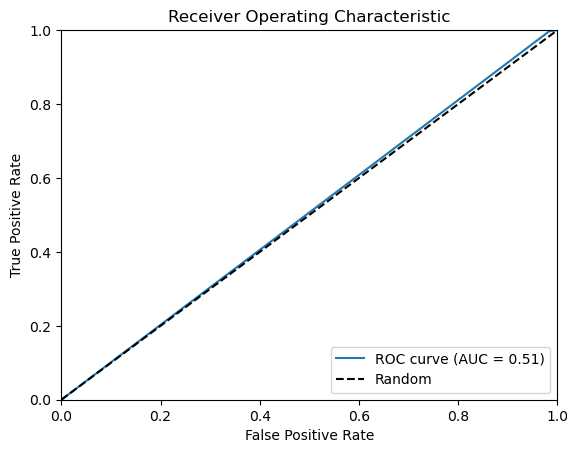

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Feature Importance

In [13]:
model = LogisticRegression() # define the model
model.fit(X, Y) # fit the model
importance = model.coef_[0] # get importance
feature_names = X_train.columns

In [28]:
importance

array([-0.32995617, -0.78187475, -9.66902504, -0.68927727,  0.32460182,
        0.09592438, -1.56238632, -0.44364992, -0.04061208, -0.10991414])

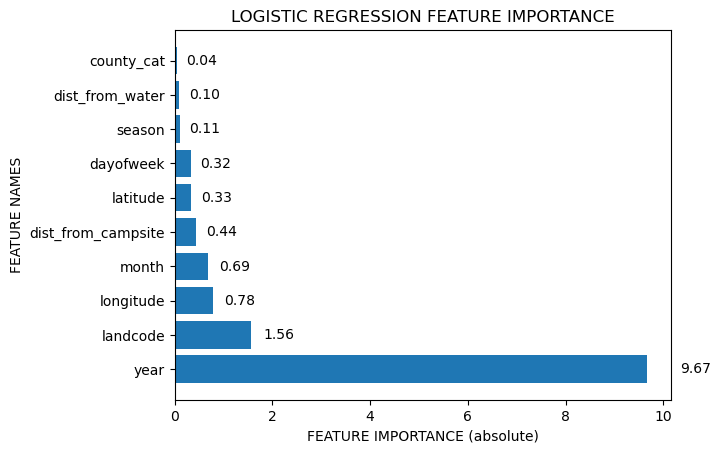

In [42]:
data={'feature_names':feature_names,'feature_importance':abs(importance)}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

rects = plt.barh(fi_df['feature_names'],fi_df['feature_importance'])


for rect in rects:
    width = rect.get_width()
    plt.text(1.05*rect.get_width()+0.5, rect.get_y()+0.5*rect.get_height(),
             '%.2f' % width,
             ha='center', va='center')

#Add chart labels
plt.title('LOGISTIC REGRESSION FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE (absolute)')
plt.ylabel('FEATURE NAMES')
plt.show()